# **Feature Scaling**

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [63]:
df = pd.read_csv("Social_Network_Ads.csv",usecols=['Age','EstimatedSalary','Purchased'])
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


## **1. Without Scaling**

In [64]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [65]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [66]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2,random_state=42,stratify=y)

[]

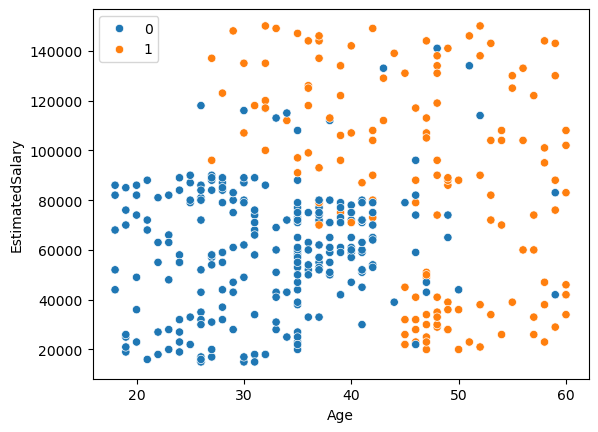

In [67]:
sns.scatterplot(data=df,x='Age',y='EstimatedSalary',hue='Purchased')
plt.legend()
plt.plot()

In [68]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

c:\Users\nasrullah\.conda\envs\tf_env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [69]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [70]:
history = model.fit(X_train,y_train,verbose=1,validation_data=(X_test,y_test),epochs=100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.6185 - loss: 1268.6370 - val_accuracy: 0.3625 - val_loss: 765.1376
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4219 - loss: 489.4881 - val_accuracy: 0.6375 - val_loss: 230.0290
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4875 - loss: 189.6478 - val_accuracy: 0.6375 - val_loss: 82.6016
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4908 - loss: 99.8279 - val_accuracy: 0.6375 - val_loss: 25.3165
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4402 - loss: 87.0875 - val_accuracy: 0.3625 - val_loss: 74.0936
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4584 - loss: 68.5714 - val_accuracy: 0.6375 - val_loss: 26.3639
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5823 - loss: 17.8477 - val_accuracy: 0.6500 - val_loss: 9.8152
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5612 - loss: 19.496

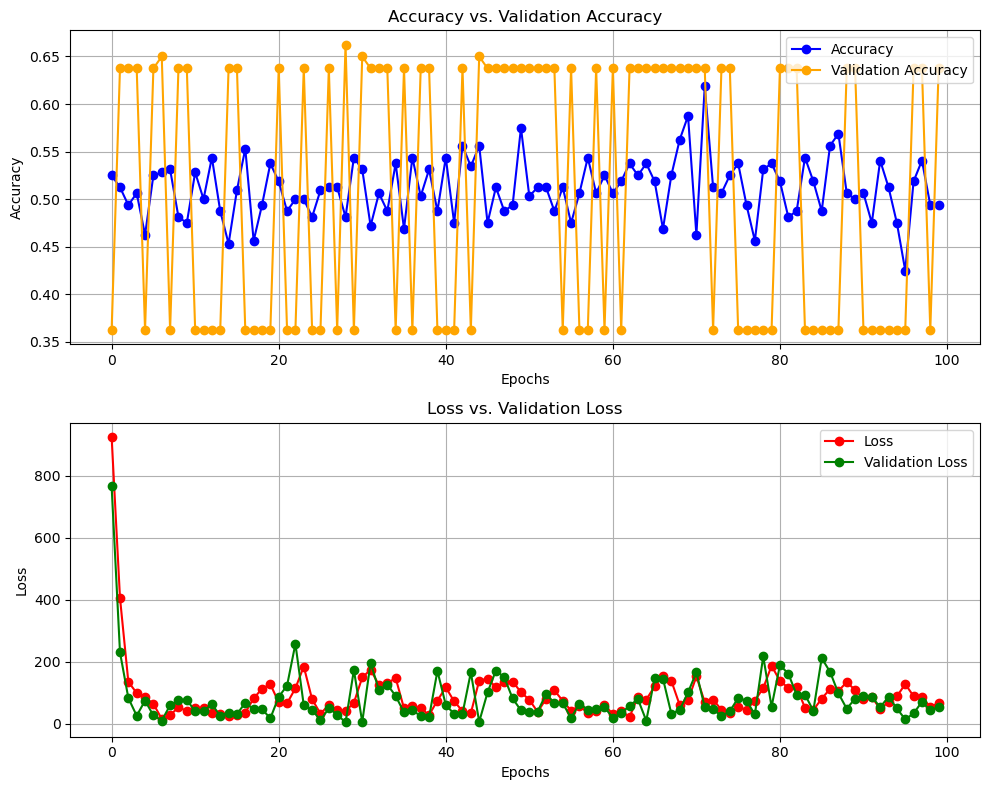

In [71]:
# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Plot Accuracy and Validation Accuracy
axs[0].plot(history.history['accuracy'], label='Accuracy', color='blue', marker='o')
axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange', marker='o')
axs[0].set_title('Accuracy vs. Validation Accuracy')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].legend()
axs[0].grid()

# Plot Loss and Validation Loss
axs[1].plot(history.history['loss'], label='Loss', color='red', marker='o')
axs[1].plot(history.history['val_loss'], label='Validation Loss', color='green', marker='o')
axs[1].set_title('Loss vs. Validation Loss')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].legend()
axs[1].grid()

# Adjust layout
plt.tight_layout()
plt.show()

## **2. With Scaling**

In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [73]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim = 2))
model.add(Dense(1,activation='sigmoid'))

c:\Users\nasrullah\.conda\envs\tf_env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [74]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [75]:
history = model.fit(X_train_scaled,y_train,verbose=1,epochs=100,validation_data=(X_test_scaled,y_test))

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.3891 - loss: 0.6814 - val_accuracy: 0.6000 - val_loss: 0.6475
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7492 - loss: 0.6251 - val_accuracy: 0.7875 - val_loss: 0.6136
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8365 - loss: 0.5878 - val_accuracy: 0.8250 - val_loss: 0.5827
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8834 - loss: 0.5395 - val_accuracy: 0.8375 - val_loss: 0.5562
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8799 - loss: 0.5196 - val_accuracy: 0.8375 - val_loss: 0.5316
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8809 - loss: 0.4654 - val_accuracy: 0.8000 - val_loss: 0.5087
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8646 - loss: 0.4661 - val_accuracy: 0.8125 - val_loss: 0.4867
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8589 - loss: 0.4468 - val_accuracy: 0.81

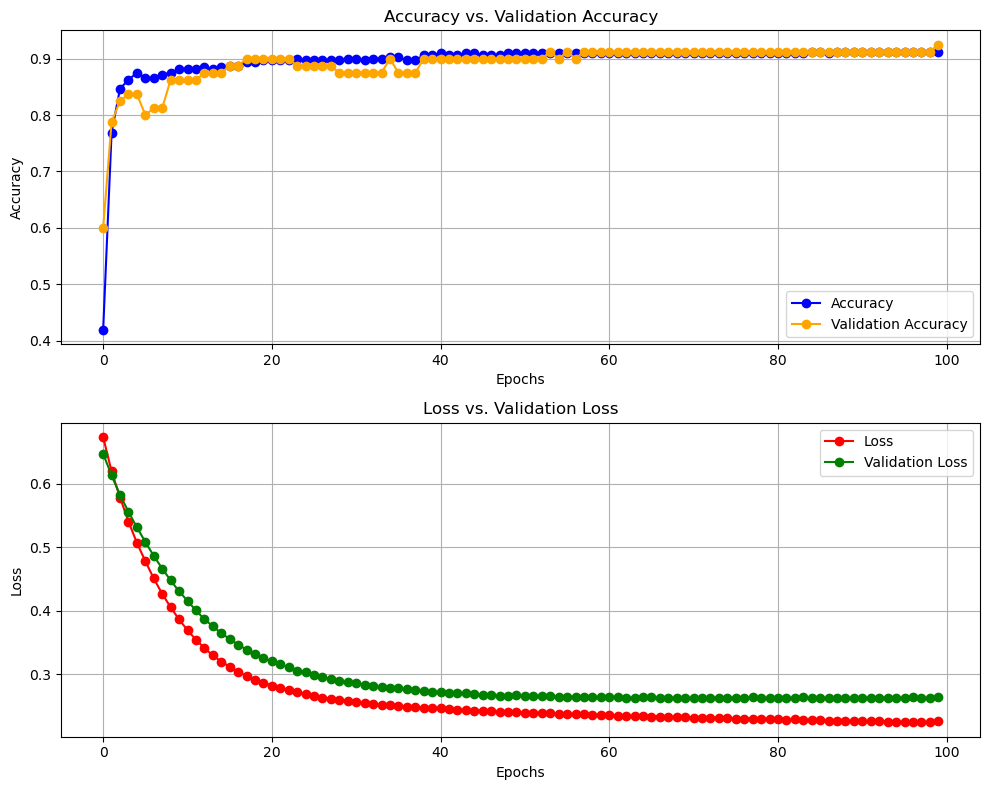

In [76]:
# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Plot Accuracy and Validation Accuracy
axs[0].plot(history.history['accuracy'], label='Accuracy', color='blue', marker='o')
axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange', marker='o')
axs[0].set_title('Accuracy vs. Validation Accuracy')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].legend()
axs[0].grid()

# Plot Loss and Validation Loss
axs[1].plot(history.history['loss'], label='Loss', color='red', marker='o')
axs[1].plot(history.history['val_loss'], label='Validation Loss', color='green', marker='o')
axs[1].set_title('Loss vs. Validation Loss')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].legend()
axs[1].grid()

# Adjust layout
plt.tight_layout()
plt.show()